## Data Analysis With Python Pandas

In python, pandas is one of the most advanced yet easy to use data analysis tools ever created. We will take a look at how to perfrom data analysis operations using stock data. First lets Install Pandas Into Jupyters Notebook.

Run the following block of code to download all the neccassary libraries for the lesson. 

In [1]:
#Run This Code
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pandas-datareader
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

    100% |████████████████████████████████| 31.2MB 76kB/s  eta 0:00:01   12% |████                            | 4.0MB 9.1MB/s eta 0:00:03


Now that we have installed pandas and pandas-datareader, we will set up our data connection. Since we will be using pandas_datareader to connect to a database and pull the data, an internet connection will be required at least for the initial setup. After a connection has been made, you will be able to write the data to a csv file if desired (See Lesson on reading and writing from .csv and .txt files). The datasource we will be using is IEX. IEX provides free use of their end of day stock prices for anyone, but if planning on using the following for bulk downloads of stock data for hundreds of tickers it will be neccassary to follow their api guidelines for bulk downloading without causing massive strains on their servers.

The following code will set up all the neccassary inputs and libraries so our pandas datareader and other packages will be able to run without any problems.

In [2]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


start = dt.datetime(2016, 1, 1)
end = dt.datetime(2016, 12, 31)

df = pdr.DataReader('AAPL', 'iex', start, end)
print(df)

                open      high       low     close     volume
date                                                         
2016-01-04   97.3268   99.9428   96.7482   99.9257   67649387
2016-01-05  100.3051  100.3999   97.1371   97.4216   55790992
2016-01-06   95.3823   97.0991   94.7278   95.5151   68457388
2016-01-07   93.5991   94.9745   91.4650   91.4839   81094428
2016-01-08   93.4758   94.0070   91.7780   91.9677   70798016
2016-01-11   93.8742   93.9595   92.3281   93.4568   49739377
2016-01-12   95.3728   95.5056   93.7508   94.8132   49154227
2016-01-13   95.1547   95.9799   92.2902   92.3755   62439631
2016-01-14   92.9162   95.3064   90.8105   94.3959   63170127
2016-01-15   91.2468   92.6791   90.4501   92.1289   79833891
2016-01-19   93.3430   93.5707   90.5828   91.6831   53087747
2016-01-20   90.2034   93.1341   88.6099   91.8064   72334416
2016-01-21   92.0625   92.8403   90.0517   91.3417   52161463
2016-01-22   93.5517   96.2360   93.3051   96.1980   65800467
2016-01-

As you can see, we have pulled stock data for apple and can now view the dataframe above giving the daily open, high, low, close, and volume for apple. We will now learn how to use our pandas dataframe using pandas indexing notation. To start lets assume that we would like to find the daily returns based only off the closing price. To do this we can reference the column containing the closing price by indexing the dataframe via column keyword. We can also create a new column by setting the dataframe along with the index key to a new set of values. This will all make much more sense once you are able to see the actual code. For The Following Examples, An Explanation Of What Is Happening Will Be Given After Each Block.

In [3]:
df['Daily-Returns'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1)) * 100

Here We Create A New Column Called Daily Returns. We Find The Daily Returns Using The Closing Price Column To Find The Return
The Following Code: df['close'].shift(1) Is How We Can Set The Value 1 Row Back Using The .shift(n) Function. Using .shift(n) Allows Us To Find The Current Column i-n Rows Back. 

One Thing That Makes Pandas So Easy To Use Is How It Aligns The Data For You. If You Remember From The numpy Lesson It Can Be Very Time Consuming To Have To Manually Index Arrays To Perform Vector Operations. Luckily Pandas Provides Us With The 
Neccassary Functions So We Can Quickly Write Code Without Having To Worry About Data Being Misaligned.

In [4]:
#Calculating The Moving Average
df['Moving-Average'] = df['close'].rolling(30).mean()

#Calculating The Standard Deviation
df['Stdev'] = df['close'].rolling(30).std()

Next We Will Create The Moving Average and Stdev Columns By Using .rolling() and .mean() Pandas Functions.To Explain .rolling(window=n) Better Lets Imagine That We Start At The Start Of Our Data Frame And Want To Find The 30 Day Moving Average All The Way Up To The Last Data Point. What We Do NOT Want To Do Is Find Just The Last 30 Days Average Or To Cumulatively Add On To The 30 Day Moving-Average Making It A 31 Day Average 31 Rows In and a 32 Day Average 32 Rows In etc... With .rolling(window=n) We Can Set Our Window == To The Length Of Time We Want To Find A Rolling Function For And Then On Row 31 Only Find The Moving Average For The Last 30 Days. This Is The Same On Day 32 and 33etc.. One Thing To Keep In Mind When Using .rolling() Is That It Only Works WithSome Functions. A Few Of These Functions Are .mean(), .std(), .median(), .mode(), and .sum(). Another Thing To

Keep In Mind With .rolling() Is It Only Works If A Function Is Being Called. If For Example You Were To Try And Do df['close'].rolling(30) Withput Calling A .rolling() Function After It Would Throw An Error.

In [5]:
#Finding The Range Between The High and Low Price
df['High-Low'] = np.subtract(df['high'], df['low'])

#Finding The Difference Between The Current Close Price and The Rolling Moving Average
df['Close-MA'] = np.subtract(df['close'],df['Moving-Average'])

You Can See Above That Pandas Allows Calculations To Be Made Using Numpy Which Provides An Even Faster Way To Compute Across The DataFrame. 

Next You Can See How We Use Pandas Drop Function To Drop All NaN Values. By Calling .dropna() We Automatically Create Our Starting Row With A Row Of All non-NaN Values. The Next Part Is The .reset_index(drop=True). All This Does Is Resets Our Starting Index Back To 0 So If Trying To Access A Specific Point Using .iloc 
(How To Use This Will Be Shown Later) The New Index Will Be Standardized To Make Finding A Specific Row In A Specific Column Much Easier).

Also, Lets Look At How We Can Format Our Dataframe So Our Output Will Fit Within The Output Window. Pandas Index Notation Not Only Allows Us To Index A Specific Column But Also Index Multiple Columns At Once. Here We Use df.iloc[] To Instruct Pandas On Exactly How We Want To Output Our Dataframe. The Following Code Is Saying This:

df.iloc[:"This Means We Want All Rows Of The Frame"]
df.iloc[:,"The Comma Means We Are Now Indexing By Columnn Instead Of Row"]
df.iloc[:,0"The Key 0 Means We Want The First Column Through Column n:5"]
df.iloc[:,0:5"Lastly The 5 Means We Want All Columns Up To The 5th Column"]

Dont Forget That The Index [-1] Means The Last One. So By Saying print(df.iloc[:,5:-1]) We Are Saying From The 5th Index To The Last Column Of The Dataframe.


*Note: There Are Other Windows That Can Be Applied Such As A Gaussian Window For More Advanced Statistics. This Will Be Covered In Our Advanced Statistics and Machine Learning Lessons. For Now There Is No Need To Adjust The Window Type For .rolling() Functions.

Lets look at what we have done so far. You can run the following block to see what our dataframe currently looks like.

In [6]:
#Adding A Function To Drop Our NaN Values And Reset Our Index To 0
df = df.dropna().reset_index(drop=True)

#Outputting Our DataFrame
print(df.iloc[:,0:5])
print(df.iloc[:,5:-1])

         open      high       low     close    volume
0     90.6166   92.3618   90.2256   92.1615  49057916
1     92.1902   93.6588   91.6942   93.5730  44863243
2     94.2596   94.3073   91.6380   91.7992  39020983
3     91.5512   92.2759   91.3605   91.5893  35374173
4     91.8468   92.4095   91.4749   92.3904  34280758
5     91.9327   92.0280   90.1684   90.3019  31942633
6     89.6248   91.9136   88.9954   91.6466  36255745
7     91.5989   92.2760   90.8360   92.2760  27582659
8     92.6956   93.4811   92.1043   92.4190  28991131
9     92.3713   93.6779   92.1711   92.2092  35216277
10    93.1247   96.1001   92.9054   95.8713  50407147
11    95.8522   96.2146   95.0225   96.0811  33169560
12    95.9190   96.9965   95.7950   96.7963  36955742
13    97.6260   98.9421   96.6723   98.2363  46055100
14    97.6451   98.0647   96.2813   97.1492  35915810
15    96.1097   97.0443   95.7473   96.3481  31561889
16    96.6151   96.8726   95.6233   96.4339  27201683
17    96.7105   97.5020   95

In [7]:
#Writing Our Signal: We Will Use A Move From False To True For Buy And True To False For Sell
df['Signal'] = np.where(np.logical_and(df['Close-MA'] > 0, df['Daily-Returns'] > 0, where=True),True,False)

df = df.dropna().reset_index(drop=True)

Now that we have our signal, we will next write the code to create a backtest engine. If you get confused dont worry, it will all be explained after. For now, just try and pick up on what you already know in the code and make note of the stuff that looks new. 

To Start Lets Get All of The Variables We Will Be Needing Set-up. We will take the dataframe columns [close] and [signal] and set them to numpy arrays. Since We Dropped The NaN Values At The End of Our Frame, We Will Not Have To Worry About Being Off.

In [8]:
#Holds The Daily Closing Price
daily_close = np.array(df['close'], dtype=np.float)
#Holds Our Signal For Buying and Selling
signal = np.array(df['Signal'], dtype=np.float)
#Condition For Checking To See If We Already Own It To Skip Buy Signals if We Do Own It
current_holding = False
#Price We Buy The Stock At
buy_price = None
#Price We Sell The Stock At
sell_price = None
#Empty Lists To Hold Our Daily Results
total_profit = []
cumulative_profit = []
#Counts The Total Trades
trade_count = 0

Next We Will Build The "Backtest Engine" Which Will Track Our Trades On Apple And Provide Us With A List Of Results. We Will Start With i Being The index and use np.arange(to spawn numbers from 1 to the length of the array holding the signals).

In [9]:
for i in np.arange(1, len(signal)):
    
    if current_holding == False:
    
        if signal[i] == True and signal[i-1] != True:
            
            trade_count += 1          
            buy_price = daily_close[i]
            current_holding = True
            
    elif current_holding == True:
        
        if signal[i] == False and signal[i-1] != False:
            
            trade_count += 1
            sell_price = daily_close[i]
            current_holding = False
            trade_profit = ((sell_price - buy_price) / buy_price) * 100
            total_profit.append(trade_profit)
            cumulative_profit.append(np.sum(total_profit))

#Creating A Dataframe For Our Results Using Nothing But Printing and Formatting Commands          
print('||Ticker: AAPL | Market Cap: $850Bn | Signal: Technical |Rating: B||')
print('--------------------------------------------------------------------')
print('|Sum of Total Profit:     ', '{:>12}'.format(np.round(np.sum(total_profit), 3)), '%', '|')
print('|Average of Total Profit: ', '{:>12}'.format(np.round(np.mean(total_profit),3)), '%', '|')
print('|Stdev of Total Profit:   ', '{:>12}'.format(np.round(np.std(total_profit), 3)), '%', '|')

||Ticker: AAPL | Market Cap: $850Bn | Signal: Technical |Rating: B||
--------------------------------------------------------------------
|Sum of Total Profit:             7.873 % |
|Average of Total Profit:         0.207 % |
|Stdev of Total Profit:            1.87 % |


Next we will plot our backtest using the matplotlib library so we can visually see how our trading system worked. 

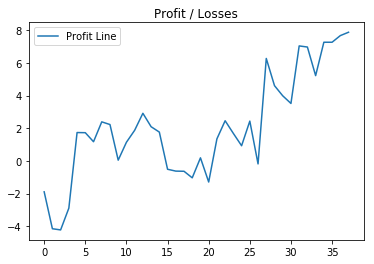

In [10]:
x_plot = [i for i in np.arange(len(cumulative_profit))]
y_plot = cumulative_profit

plt.plot(x_plot, y_plot)
plt.title('Profit / Losses')
plt.legend(['Profit Line'], loc='upper left')
plt.show()

## Advanced Functions In Pandas DataFrame

Now that we have covered the basics, lets learn how we can do some more advanced things using pandas and numpy/scipy libraries.

Next we will look at some statistical techniques including plotting across a Gaussian Normal Probabilty Density Function and some linear regression which will also serve as an intro into basic machine learning. 

To start, we will find the natural log of two different rates of change and run these results through an inverse fisher transformation to give more extreme swings to relatively subtle changes.

*(Formulas:  
Rate of Change  = (((X[i] - X[i-n]) / X[i-n]) * 100)
Natural log ROC = ln(ROC(x) / ROC(y))
Inverse Fisher  = [((e^(x*2)) -1)) / ((e^(x*2)) +1)]

Our inverse fisher transform (IFT) will make use of both numpy and pandas to help us solve it. Since their will be some runtime warnings when running since our ['Log-ROC'] will encounter some invalid values due to the nature of the calculation, we will import the warnings library and use the simple filter to not throw exceptions for runtime warnings. 

In [11]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings


start = dt.datetime(2016, 1, 1)
end = dt.datetime(2016, 12, 31)

df = pdr.DataReader('AAPL', 'iex', start, end)
print(df)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    df['ROC-1'] = (((df['close'] - df['close'].shift(7)) / df['close'].shift(7)) * 100)
    df['ROC-2'] = (((df['close'] - df['close'].shift(14)) / df['close'].shift(14)) * 100)

    df['Log-ROC'] = np.log(df['ROC-1'] / df['ROC-2'])
    df['IFT'] = np.divide((np.exp(df['Log-ROC']*2) -1), (np.exp(df['Log-ROC']*2)+1))

df = df.dropna().reset_index(drop=True)

print(df)

                open      high       low     close     volume
date                                                         
2016-01-04   97.3268   99.9428   96.7482   99.9257   67649387
2016-01-05  100.3051  100.3999   97.1371   97.4216   55790992
2016-01-06   95.3823   97.0991   94.7278   95.5151   68457388
2016-01-07   93.5991   94.9745   91.4650   91.4839   81094428
2016-01-08   93.4758   94.0070   91.7780   91.9677   70798016
2016-01-11   93.8742   93.9595   92.3281   93.4568   49739377
2016-01-12   95.3728   95.5056   93.7508   94.8132   49154227
2016-01-13   95.1547   95.9799   92.2902   92.3755   62439631
2016-01-14   92.9162   95.3064   90.8105   94.3959   63170127
2016-01-15   91.2468   92.6791   90.4501   92.1289   79833891
2016-01-19   93.3430   93.5707   90.5828   91.6831   53087747
2016-01-20   90.2034   93.1341   88.6099   91.8064   72334416
2016-01-21   92.0625   92.8403   90.0517   91.3417   52161463
2016-01-22   93.5517   96.2360   93.3051   96.1980   65800467
2016-01-

Using the scipy library linear regression library, we can find the slope and r_value of the stock. To do this, we will convert our Closing prie column to an array. We will also make an incremental list using pythons list comprehension for our x values.

In [12]:
import scipy.stats
from scipy.stats import linregress

c = np.array(df['close'], dtype=np.float)
x = [i for i in range(len(c))]

gradient = []; intercept = []; r_value = []; r_squared = []; 

p_value = []; std_error = []; price = []

n = 30

for i in  np.arange(0, len(c) -n+1):
    
    slope, intrcpt, r, p, error = scipy.stats.linregress(x[i:i+n], c[i:i+n])

    gradient.append(np.round(slope, 3))

    intercept.append(np.round(intrcpt, 3))

    r_value.append(np.round(r, 3))

    coef = np.round(r ** 2, 3)

    r_squared.append(coef)

    p_value.append(np.round(p, 4))

    std_error.append(np.round(error, 3))

    price.append(np.round(c[i+n-1], 2))
    
regress_frame = pd.DataFrame({"Price":price, "Slope":gradient, "R":r_value, "R^2":r_squared})
regress_frame['P'] = p_value
regress_frame['Std-Error'] = std_error

print(regress_frame)




      Price  Slope      R    R^2       P  Std-Error
0    100.90  0.386  0.910  0.828  0.0000      0.033
1    101.01  0.395  0.913  0.833  0.0000      0.033
2    101.00  0.403  0.916  0.839  0.0000      0.033
3    101.77  0.432  0.939  0.881  0.0000      0.030
4    101.21  0.435  0.940  0.883  0.0000      0.030
5    100.77  0.441  0.945  0.893  0.0000      0.029
6    102.69  0.461  0.958  0.917  0.0000      0.026
7    104.48  0.478  0.961  0.923  0.0000      0.026
8    103.94  0.480  0.961  0.924  0.0000      0.026
9    104.89  0.478  0.961  0.924  0.0000      0.026
10   105.97  0.478  0.961  0.924  0.0000      0.026
11   104.72  0.489  0.968  0.937  0.0000      0.024
12   105.82  0.491  0.968  0.937  0.0000      0.024
13   103.51  0.476  0.959  0.920  0.0000      0.026
14   103.97  0.444  0.953  0.908  0.0000      0.027
15   105.32  0.424  0.951  0.904  0.0000      0.026
16   106.85  0.412  0.952  0.907  0.0000      0.025
17   106.91  0.394  0.957  0.916  0.0000      0.023
18   102.50 

The next signal we make will be a little bit more advanced than the last one, but not too much. Our signal will run by 